#####Neural network for image classification

###Approach 1 - extract all the pixels

In [1]:
import cv2
import numpy as np
import os
import zipfile
#import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

##Extracting pixels from images

In [2]:
path = 'Computer_Vision_Masterclass_files\Datasets\homer_bart_1.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [3]:
directory = 'homer_bart_1'
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
print(files)

['homer_bart_1\\.DS_Store', 'homer_bart_1\\bart1.bmp', 'homer_bart_1\\bart10.bmp', 'homer_bart_1\\bart100.bmp', 'homer_bart_1\\bart101.bmp', 'homer_bart_1\\bart102.bmp', 'homer_bart_1\\bart103.bmp', 'homer_bart_1\\bart104.bmp', 'homer_bart_1\\bart105.bmp', 'homer_bart_1\\bart106.bmp', 'homer_bart_1\\bart108.bmp', 'homer_bart_1\\bart109.bmp', 'homer_bart_1\\bart11.bmp', 'homer_bart_1\\bart110.bmp', 'homer_bart_1\\bart111.bmp', 'homer_bart_1\\bart112.bmp', 'homer_bart_1\\bart113.bmp', 'homer_bart_1\\bart114.bmp', 'homer_bart_1\\bart115.bmp', 'homer_bart_1\\bart116.bmp', 'homer_bart_1\\bart117.bmp', 'homer_bart_1\\bart118.bmp', 'homer_bart_1\\bart119.bmp', 'homer_bart_1\\bart12.bmp', 'homer_bart_1\\bart120.bmp', 'homer_bart_1\\bart121.bmp', 'homer_bart_1\\bart122.bmp', 'homer_bart_1\\bart123.bmp', 'homer_bart_1\\bart124.bmp', 'homer_bart_1\\bart125.bmp', 'homer_bart_1\\bart126.bmp', 'homer_bart_1\\bart127.bmp', 'homer_bart_1\\bart128.bmp', 'homer_bart_1\\bart13.bmp', 'homer_bart_1\\bart13

In [4]:
type(files)

list

In [5]:
height, width = 128, 128

In [6]:
images = []
classes = []

In [7]:
for image_path in files:
  #print(image_path)
  try:
    image = cv2.imread(image_path)
    (H, W) = image.shape[:2]
  except:
    continue

  image = cv2.resize(image, (width, height))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  '''
  #To Display image
  if image is not None:
    # Display the image
    cv2.imshow('image', image)

    # Wait for a key press and close the window
    cv2.waitKey(0)
    cv2.destroyAllWindows()
  else:
    print("Error: Unable to read the image.")
  '''

  image = image.ravel()
  print(image.shape)

  images.append(image)

  image_name = os.path.basename(os.path.normpath(image_path))
  if image_name.startswith('b'):
    class_name = 0
  else:
    class_name = 1

  classes.append(class_name)
  print(class_name)

(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0


(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0
(16384,)
0

In [8]:
images

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 254, ..., 254, 254, 254], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 128, 123, 124], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 254, ..., 254, 254, 254], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 2

In [9]:
print(classes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [10]:
type(images), type(classes)

(list, list)

In [11]:
X = np.asarray(images)
y = np.asarray(classes)

In [12]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [13]:
X.shape

(269, 16384)

In [14]:
y.shape

(269,)

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [16]:
X[0].reshape(width, height).shape

(128, 128)

In [17]:
cv2.imshow('image', X[0].reshape(width, height))
cv2.waitKey(0)
cv2.destroyAllWindows()
'''
#To Display image
if X[0] is not None:
    # Display the image
    cv2.imshow('image', X[0].reshape(width, height))

    # Wait for a key press and close the window
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Error: Unable to read the image.")
'''


'\n#To Display image\nif X[0] is not None:\n    # Display the image\n    cv2.imshow(\'image\', X[0].reshape(width, height))\n\n    # Wait for a key press and close the window\n    cv2.waitKey(0)\n    cv2.destroyAllWindows()\nelse:\n    print("Error: Unable to read the image.")\n'

In [18]:
cv2.imshow('image', X[200].reshape(width, height))
cv2.waitKey(0)
cv2.destroyAllWindows()

<Axes: ylabel='count'>

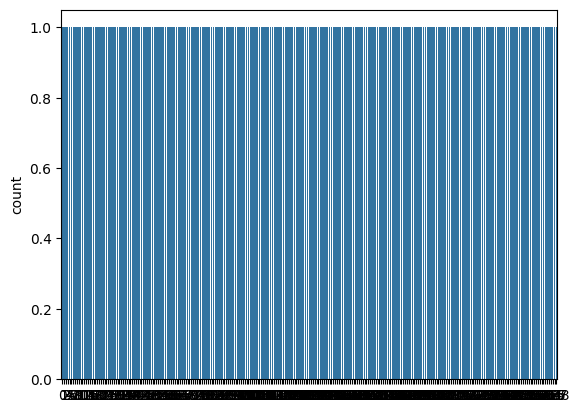

In [19]:
sns.countplot(y)

In [20]:
np.unique(y, return_counts=True)

(array([0, 1]), array([160, 109], dtype=int64))

##Normalizing the data

In [21]:
X[0].max(), X[0].min()

(255, 0)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [23]:
X[0].max(), X[0].min()

(1.0000000000000002, 0.0)

In [24]:
X[1]

array([0.9947644 , 0.99479167, 0.99479167, ..., 0.99559471, 0.99595142,
       0.9950495 ])

##Train and test set

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [27]:
X_train.shape, y_train.shape

((215, 16384), (215,))

In [28]:
X_test.shape, y_test.shape

((54, 16384), (54,))

##Building and training the neural network

In [29]:
(16384 + 2) / 2

8193.0

In [30]:
# 16384 -> 8193 -> 8193 -> 1
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape=(16384,), units=8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units=8193, activation = 'relu'))
network1.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [31]:
network1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201383941 (768.22 MB)
Trainable params: 201383941 (768.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# https://keras.io/api/optimizers/
# https://keras.io/api/losses/
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [33]:
history = network1.fit(X_train, y_train, epochs=50)

Epoch 1/50


7/7 [==============================] - 62s 7s/step - loss: 146.2026 - accuracy: 0.4651
Epoch 2/50
7/7 [==============================] - 20s 3s/step - loss: 14.9712 - accuracy: 0.4372
Epoch 3/50
7/7 [==============================] - 19s 3s/step - loss: 5.5933 - accuracy: 0.4930
Epoch 4/50
7/7 [==============================] - 22s 3s/step - loss: 2.2168 - accuracy: 0.5302
Epoch 5/50
7/7 [==============================] - 18s 3s/step - loss: 1.2324 - accuracy: 0.5395
Epoch 6/50
7/7 [==============================] - 18s 3s/step - loss: 0.7822 - accuracy: 0.6093
Epoch 7/50
7/7 [==============================] - 18s 3s/step - loss: 0.6824 - accuracy: 0.5628
Epoch 8/50
7/7 [==============================] - 19s 3s/step - loss: 0.7138 - accuracy: 0.5256
Epoch 9/50
7/7 [==============================] - 18s 3s/step - loss: 0.7029 - accuracy: 0.5814
Epoch 10/50
7/7 [==============================] - 24s 3s/step - loss: 0.7655 - accuracy: 0.5163
Epoch 11/50
7/7 [=================

##Evaluating the neural network

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

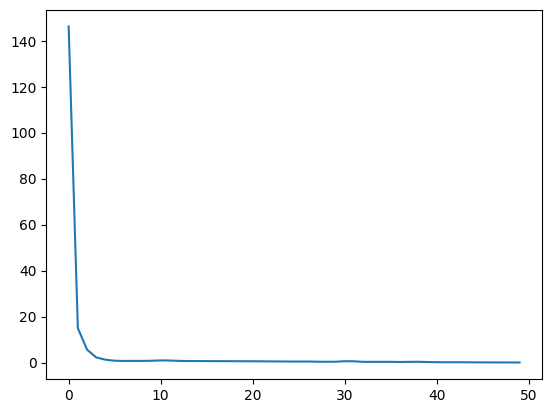

In [35]:
plt.plot(history.history['loss'])

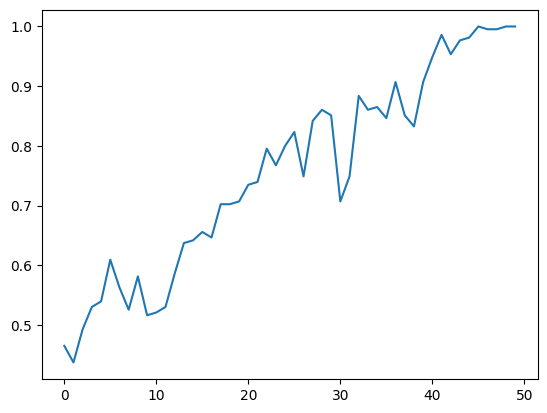

In [36]:
plt.plot(history.history['accuracy'])

In [37]:
X_test.shape

(54, 16384)

In [38]:
predictions = network1.predict(X_test)
predictions

2/2 [==============================] - 1s 160ms/step


array([[0.01494502],
       [0.9969049 ],
       [0.01805776],
       [0.10871814],
       [0.70099765],
       [0.02629646],
       [0.9960234 ],
       [0.86044914],
       [0.4218869 ],
       [0.8384532 ],
       [0.08881059],
       [0.9999077 ],
       [0.7313265 ],
       [0.71205467],
       [0.13087134],
       [0.0384824 ],
       [0.20594177],
       [0.6744136 ],
       [0.06501373],
       [0.01344637],
       [0.00981413],
       [0.7828664 ],
       [0.01754104],
       [0.1534487 ],
       [0.08752529],
       [0.7511176 ],
       [0.02583438],
       [0.02895952],
       [0.12307085],
       [0.9616482 ],
       [0.26834744],
       [0.9953348 ],
       [0.7720715 ],
       [0.0038812 ],
       [0.9995646 ],
       [0.01653315],
       [0.5432356 ],
       [0.02324272],
       [0.20161088],
       [0.00871548],
       [0.9416371 ],
       [0.8900513 ],
       [0.1217185 ],
       [0.0338623 ],
       [0.03782207],
       [0.36860073],
       [0.9555318 ],
       [0.024

In [39]:
# 0 False - Bart
# 1 True  - Homer

In [40]:
predictions = (predictions > 0.5)
predictions

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False]])

In [41]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7037037037037037

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[22,  6],
       [10, 16]], dtype=int64)

<Axes: >

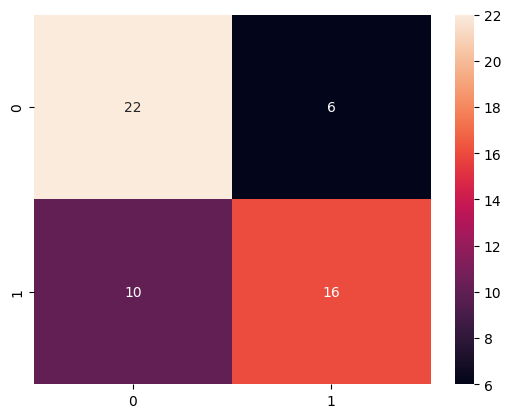

In [44]:
sns.heatmap(cm, annot=True)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.79      0.73        28
           1       0.73      0.62      0.67        26

    accuracy                           0.70        54
   macro avg       0.71      0.70      0.70        54
weighted avg       0.71      0.70      0.70        54



##Saving and loading the network

In [46]:
model_json = network1.to_json()
with open('network1.json', 'w') as json_file:
  json_file.write(model_json)

In [47]:
from keras.models import save_model
network1_saved = save_model(network1, 'weights1.hdf5')

C:\Users\User\AppData\Local\Temp\ipykernel_23608\3936942524.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network1_saved = save_model(network1, 'weights1.hdf5')


In [48]:
with open('network1.json') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 16384], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 16384], "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 16384]}}, {"module": "keras.layers", "class_name": "Dense

In [49]:
network1_loaded = tf.keras.models.model_from_json(json_saved_model)
network1_loaded.load_weights('weights1.hdf5')
network1_loaded.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [50]:
network1_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201383941 (768.22 MB)
Trainable params: 201383941 (768.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Classifying one single image

In [51]:
X_test[38].shape

(16384,)

In [52]:
test_image = X_test[38]
test_image = scaler.inverse_transform(test_image.reshape(1, -1))

In [53]:
test_image

array([[255., 255., 255., ..., 255., 255., 255.]])

In [54]:
cv2.imshow('image',test_image.reshape(width, height))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [55]:
network1_loaded.predict(test_image)[0][0]

1/1 [==============================] - 0s 354ms/step


0.0

In [56]:
if network1_loaded.predict(test_image)[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')

1/1 [==============================] - 0s 137ms/step
Bart
